# Digit Recognizer with deep learning

## Feedforward Naural Network

Some packages required

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Activation
from tensorflow.keras.activations import linear, relu, sigmoid, softmax

### 1. Data processing

In [162]:
train=pd.read_csv("Desktop/digit-recognizer/train.csv")
test = pd.read_csv("Desktop/digit-recognizer/test.csv")
train.head(7)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [163]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [124]:
train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


Check missing values

In [125]:
train.isnull().sum().sort_values(ascending=False)

pixel783    0
pixel267    0
pixel265    0
pixel264    0
pixel263    0
           ..
pixel519    0
pixel518    0
pixel517    0
pixel516    0
label       0
Length: 785, dtype: int64

In [126]:
count = []
for i in range(10):
    count.append(train[train['label']== i].count()[0])
    print('The amount of label',i,':',count[i]) 

The amount of label 0 : 4132
The amount of label 1 : 4684
The amount of label 2 : 4177
The amount of label 3 : 4351
The amount of label 4 : 4072
The amount of label 5 : 3795
The amount of label 6 : 4137
The amount of label 7 : 4401
The amount of label 8 : 4063
The amount of label 9 : 4188


Text(0.5, 1.0, 'Amount of each label')

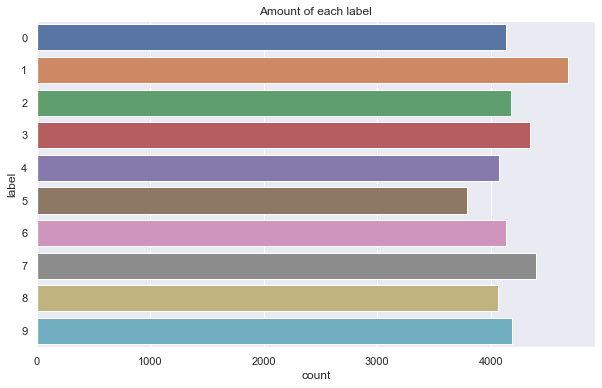

In [127]:
plt.figure(figsize=[10,6])
sns.set()
sns.countplot(y="label", data=train)
plt.title('Amount of each label')

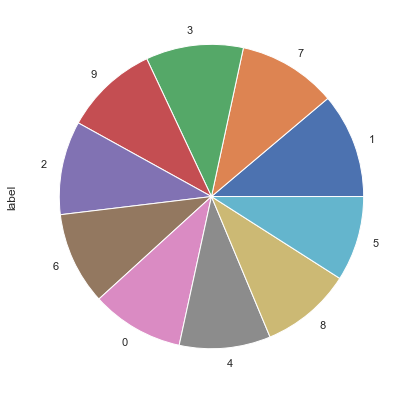

In [128]:
plt.figure(figsize=[9,7])
sns.set()
train['label'].value_counts().plot.pie()
plt.show()

Normalization

In [129]:
x_train=train.drop(columns=["label"])
y_train=train["label"]
X_train=x_train.to_numpy()/255.0
Y_train=y_train.to_numpy()
X_test=test.to_numpy()/255.0

In [164]:
X_train.shape, Y_train.shape

((42000, 784), (42000,))

Data visualization

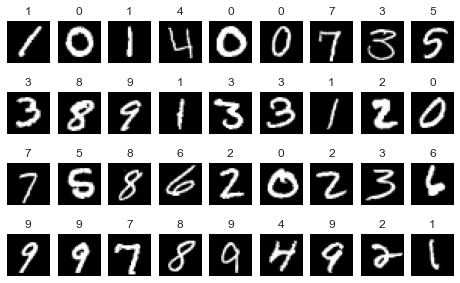

In [131]:
plt.figure(figsize = (8, 5))
fig.tight_layout()

pos, f = 1, 0
for i in range(4):
    for j in range(9):
        plt.subplot(4, 9, pos)
        plt.axis('off')
        plt.imshow(X_train[f].reshape((28, 28)), cmap = 'gray')
        plt.title(y_train[f])
        f += 1
        pos += 1

### 2. Building FNN model and training with train-dataset

In [132]:
tf.random.set_seed(777) 
model = Sequential(
    [               
        tf.keras.Input(shape=(784,)),
        
        Dense(100),
        BatchNormalization(),
        Activation('relu'),

        Dense(50),
        BatchNormalization(),
        Activation('relu'),
        
        Dense(10),
        Activation('linear'),
 
    ], name = "FNN" 
)

In [133]:
m.summary()

Model: "FNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 100)               78500     
_________________________________________________________________
batch_normalization_30 (Batc (None, 100)               400       
_________________________________________________________________
activation_45 (Activation)   (None, 100)               0         
_________________________________________________________________
dense_46 (Dense)             (None, 50)                5050      
_________________________________________________________________
batch_normalization_31 (Batc (None, 50)                200       
_________________________________________________________________
activation_46 (Activation)   (None, 50)                0         
_________________________________________________________________
dense_47 (Dense)             (None, 10)                510     

In [134]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics = ['accuracy']
)

history = model.fit(
    X_train,Y_train,
    validation_split=0.1,
    epochs=150,
    batch_size = 100
)

Train on 37800 samples, validate on 4200 samples
Epoch 1/150
37800/37800 [==============================] - 4s 111us/sample - loss: 0.3968 - accuracy: 0.8973 - val_loss: 0.1904 - val_accuracy: 0.9507
Epoch 2/150
37800/37800 [==============================] - 3s 74us/sample - loss: 0.1376 - accuracy: 0.9604 - val_loss: 0.1260 - val_accuracy: 0.9605
Epoch 3/150
37800/37800 [==============================] - 3s 74us/sample - loss: 0.0903 - accuracy: 0.9740 - val_loss: 0.1103 - val_accuracy: 0.9638
Epoch 4/150
37800/37800 [==============================] - 3s 74us/sample - loss: 0.0661 - accuracy: 0.9811 - val_loss: 0.1029 - val_accuracy: 0.9655
Epoch 5/150
37800/37800 [==============================] - 3s 77us/sample - loss: 0.0510 - accuracy: 0.9853 - val_loss: 0.0991 - val_accuracy: 0.9695
Epoch 6/150
37800/37800 [==============================] - 3s 76us/sample - loss: 0.0394 - accuracy: 0.9887 - val_loss: 0.1028 - val_accuracy: 0.9712
Epoch 7/150
37800/37800 [=========================

### 3. Train results of model

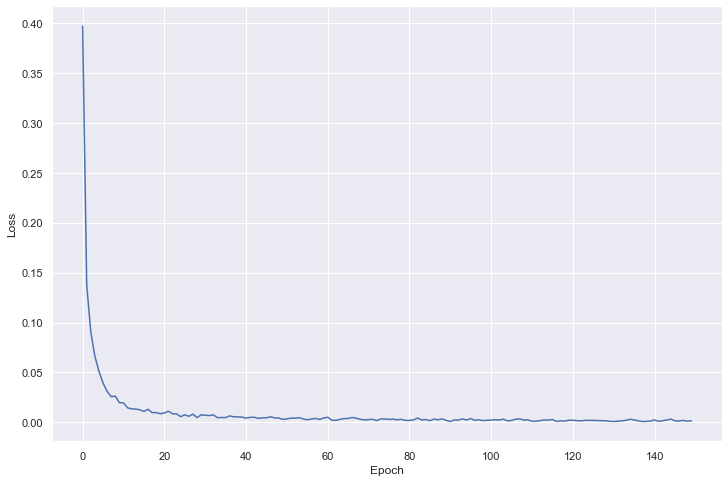

In [143]:
plt.figure(figsize=[12,8])
plt.plot(history.history['loss'], label='loss')
plt.xlabel('Epoch')
plt.ylabel('Loss') 
plt.grid('-')
plt.show()

Text(0.5, 1.0, 'Loss and Accurancy')

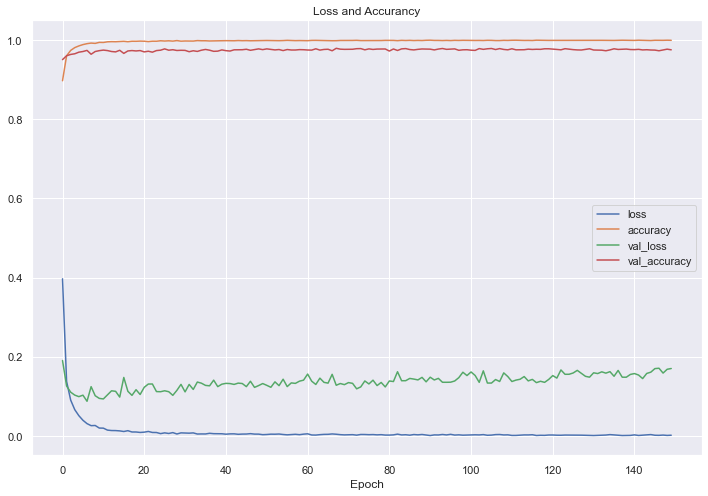

In [141]:
pd.DataFrame(history.history).plot(figsize = (12, 8))
plt.xlabel('Epoch')
plt.title('Loss and Accurancy')

In [150]:
loss, accuracy = model.evaluate(X_train,Y_train, verbose=0)
print('loss:',loss)
print('accuracy:',accuracy)

loss: 0.018316508183989468
accuracy: 0.9971905


In [154]:
# pip install sklearn
from sklearn.metrics import confusion_matrix
import itertools

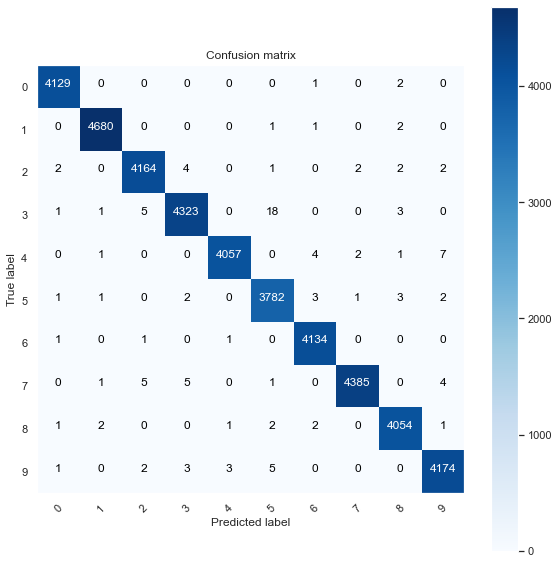

In [161]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Y_pred = model.predict(X_train)

Y_pred_classes = np.argmax(Y_pred,axis = 1) 

confusion_mtx = confusion_matrix(Y_train, Y_pred_classes) 

plt.figure(figsize = (8, 8))
plt.grid(b=None)

plot_confusion_matrix(confusion_mtx, classes = range(10)) 

### 4. Test with test-dataset

In [171]:
pred = model.predict(test.to_numpy())
pred = np.argmax(pred, axis = 1)
pred.shape

(28000,)

In [174]:
sub = pd.read_csv('Desktop/digit-recognizer/sample_submission.csv')
sub['Label'] = pred
sub

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [181]:
# sub.to_csv('submission.csv', index = False)